# K-Means Clustering

## Imports

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Fake Data

In [50]:
from sklearn.datasets import make_blobs

np.random.seed(0) # No Change When Reinvoking The Program
x, y = make_blobs(n_samples=5000, n_features=4, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

print(x[0:5])
print(y[0:5]) # Center Index (0, 1, 2 or 3)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]]
[1 2 2 1 0]


## Plotting Generated Data

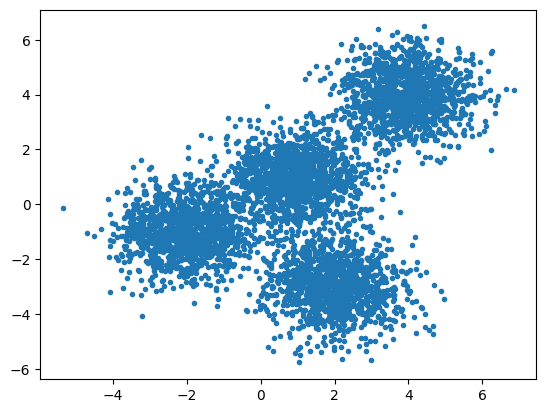

In [51]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Setting Up K-Means
### Init Parameters: 1-"k-means++", 2-"random"

In [54]:
from sklearn.cluster import KMeans

k = 4
k_means = KMeans(init="k-means++", n_clusters=k, n_init=12)
k_means.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'
